# ARIMA

Bayangkan Anda adalah pemilik toko yang menjual barang-barang elektronik. Anda ingin mengetahui berapa banyak produk tertentu yang harus dibeli untuk bulan depan agar tidak kehabisan stok. Penjualan produk Anda tidak memiliki pola musiman yang jelas, tetapi menunjukkan tren pertumbuhan yang stabil dari bulan ke bulan. Di sinilah metode ARIMA dapat membantu!

ARIMA adalah singkatan dari AutoRegressive Integrated Moving Average. Ini adalah metode statistik yang digunakan untuk memprediksi nilai di masa depan berdasarkan data historis yang sudah ada. ARIMA sangat berguna untuk menganalisis data deret waktu yang memiliki sifat stasioner atau yang dapat dijadikan stasioner melalui teknik differencing.

### Fungsi ARIMA
Pikirkan ARIMA sebagai alat yang membantu Anda memperkirakan berapa banyak barang yang harus Anda pesan berdasarkan data penjualan di masa lalu. Berikut adalah langkah-langkah bagaimana ARIMA bekerja:
1. Mempelajari Data Sebelumnya: ARIMA menganalisis data penjualan dari bulan-bulan sebelumnya untuk menemukan pola dan hubungan. Misalnya, meskipun penjualan tidak menunjukkan fluktuasi musiman yang jelas, Anda mungkin melihat bahwa penjualan terus meningkat seiring waktu.
2. Menghilangkan Tren: Untuk menggunakan ARIMA, pertama-tama kita perlu memastikan data bersifat stasioner. Jika data penjualan Anda menunjukkan tren yang jelas (misalnya, penjualan yang meningkat setiap bulan), ARIMA akan membantu menghilangkan tren ini dengan menggunakan teknik differencing untuk membuat data lebih stabil.
3. Membuat Prediksi: Setelah mempelajari data dan memastikan data stasioner, ARIMA akan menghasilkan prediksi untuk bulan-bulan mendatang. Misalnya, berdasarkan data penjualan sebelumnya, ARIMA mungkin memperkirakan bahwa pada bulan Januari, Anda akan menjual 300 unit produk tertentu.
4. Mengukur Ketepatan: Setelah prediksi dilakukan, Anda bisa membandingkan hasil prediksi dengan data penjualan aktual untuk menilai seberapa akurat prediksi tersebut. Jika hasilnya mendekati data aktual, itu menunjukkan bahwa ARIMA bekerja dengan baik dalam memprediksi penjualan.

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Penggunaan Data

In [2]:

df = pd.read_csv("penjualan.csv", sep=';')
display(df)

# Mengubah format data
# Fungsi id_vars untuk membaca baris
# Fungsi var_name untuk membaca kolom
# Fungsi value_name untuk membaca hasil
pisahdata = df.melt(id_vars=['Bulan'], var_name='Tahun', value_name='Sales')

# Mengubah kolom data sebelumnya yang sudah kita buat menjadi satu data tanggal yang utuh
pisahdata['Tanggal'] = pd.to_datetime(pisahdata['Tahun'] + ' ' + pisahdata['Bulan'])
# print(pisahdata)

# Mengatur Tanggal sebagai indeks dan memilih kolom yang relevan
sales_data = pisahdata.set_index('Tanggal')[['Sales']]

,Bulan,2020,2021,2022,2023
0,January,3488,4281,4396,3491
1,February,3764,3285,4664,3988
2,March,1437,1646,1755,1798
3,April,3667,3679,3380,3291
4,May,1349,1236,1669,1006
5,June,1411,1974,1097,1607
6,July,1157,1907,1064,1404
7,August,1166,1604,1327,1780
8,September,1873,1130,1575,1516
9,October,1991,1403,1601,1736


In [3]:
display(sales_data)

,Sales
Tanggal,
2020-01-01,3488
2020-02-01,3764
2020-03-01,1437
2020-04-01,3667
2020-05-01,1349
2020-06-01,1411
2020-07-01,1157
2020-08-01,1166
2020-09-01,1873


# 2. Visualisasikan Data Bulanan Tersebut

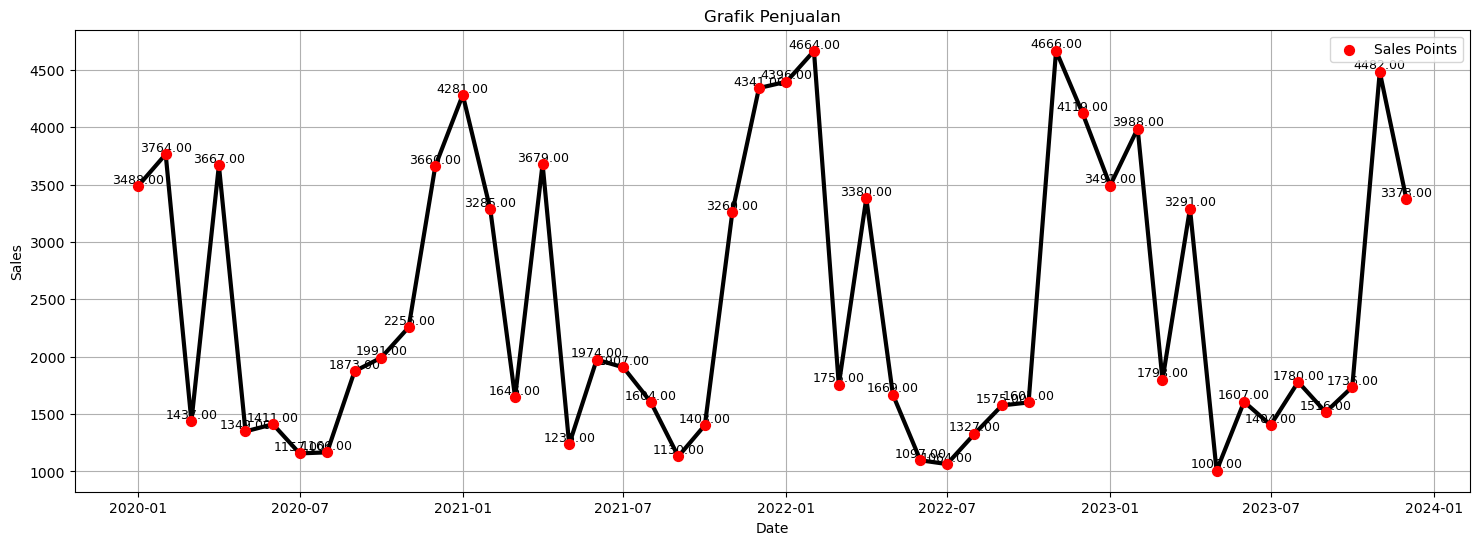

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6)) 

# Menggambar garis penjualan
plt.plot(sales_data['Sales'], linewidth=3, c='black') 

# Menambahkan titik pada setiap data penjualan
plt.scatter(sales_data.index, sales_data['Sales'], color='red', s=50, label='Sales Points', zorder=5) 

# Menambahkan tulisan nominal pada setiap titik
for i, value in enumerate(sales_data['Sales']):
    plt.text(sales_data.index[i], value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')
    
plt.title("Grafik Penjualan") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()  # Menampilkan legend
plt.grid()  # Menambahkan grid untuk lebih jelas
plt.show()


# 3. Lakukan Uji Statistioner

Langkah ini untuk menguji apakah data sudah statistik atau belum:
- Kalau datanya stasioner, artinya polanya tidak berubah terlalu banyak dari waktu ke waktu. Misalnya, penjualan naik atau turun tetapi rata-rata dan bentuk grafiknya tetap sama sepanjang waktu.
- Kalau datanya tidak stasioner, maka grafiknya bisa naik terus, turun terus, atau punya pola yang berubah-ubah, misalnya lebih tinggi di bulan tertentu dan lebih rendah di bulan lainnya.

Cara uji statistioner dapat dilakukan secara langsung dengan melihat grafiknya, tetapi ada juga penggunaan rumus untuk melihat apakah data sudah statistioner atau belum yaitu menggunakan teknik Augmented Dickey-Fuller (ADF).

### Hasil Uji:

Hasil uji menggunakan metode ADF sama seperti uji statistik, semakin ADF statictik jauh dari 0 maka data tersebut semakin stabil.

Hasil uji tersebut terbagi menjadi:
- jika p-value < 0,05 => data hasil uji stabil (Stationary)
- jika p-value > 0,05 => data hasil uji tidak stabil (Non Stationeary)

Selain itu, melihat dari data "Staionary" juga lebih baik. Nilai hasil "Stationary" harus lebih kecil dari nilai ADF, semakin kecil, menunjukkan data statisioner

In [5]:
def check_stationarity(timeseries): 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print(f'Statisioner: {result[4]}')
    if p_value < 0.05:
        Stasioner = 'stasioner'
    else:
        Stasioner = 'Non-stasioner'
    print(f'Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah {Stasioner}' )
    

check_stationarity(sales_data['Sales'])

ADF Statistic: -5.04479730158061
p-value: 1.80817094176583e-05
Statisioner: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}
Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah stasioner


# 4. Tentukan Parameter ARIMA

## Pada SARIMA, kita mengenal:
### p 
- p menunjukkan model akan "menggunakan berapa data bulan ke belakang untuk memprediksi bulan depan". Semakin besar p, semakin banyak bulan yang dilihat.

### d 
- d adalah “differencing” untuk menghilangkan tren.
- Bayangkan kamu punya data penjualan yang setiap bulan cenderung selalu naik terus menerus. d ini berfungsi untuk mengurangi atau menghilangkan tren kenaikan tersebut supaya datanya jadi lebih stabil dan tidak terlalu miring ke atas atau ke bawah.
- Cara kerja: Misalnya, kalau d=1, kita mengurangi setiap nilai dengan nilai sebelumnya. Jadi, kalau bulan ini penjualannya naik dari bulan sebelumnya, kita cuma lihat selisihnya, bukan jumlah totalnya.
- Gunanya: Untuk menghilangkan tren naik atau turun yang konsisten

### q 
- q mirip dengan p, tetapi pada q melihat kesalahan model dari bulan-bulan sebelumnya, jadi kalau ada salah di satu bulan, model bisa belajar dari kesalahan itu.

### P
- memiliki fungsi yang sama dengan p, tetapi pada P melihat pola tahunan

In [6]:
p, d, q = 1, 1, 1

# 5. Latih Model ARIMA

In [7]:
model = ARIMA(sales_data, order=(p, d, q)) 
results = model.fit()
model

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# 6. Prediksi Periode Mendatang dengan ARIMA

In [8]:
Periode = 12 
Prediksi = results.get_forecast(steps=Periode) 
Rata_Prediksi = Prediksi.predicted_mean 
Confiden_Interval_Prediksi = Prediksi.conf_int()
print("Rata-rata Prediksi Bulanan:")
display(Rata_Prediksi)

# Menampilkan interval kepercayaan untuk setiap prediksi
print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(Confiden_Interval_Prediksi)

Rata-rata Prediksi Bulanan:


2024-01-01    3807.005880
2024-02-01    3636.886044
2024-03-01    3703.568916
2024-04-01    3677.430839
2024-05-01    3687.676335
2024-06-01    3683.660347
2024-07-01    3685.234518
2024-08-01    3684.617481
2024-09-01    3684.859344
2024-10-01    3684.764540
2024-11-01    3684.801701
2024-12-01    3684.787135
Freq: MS, Name: predicted_mean, dtype: float64


Interval Kepercayaan Prediksi (Lower, Upper):


,lower Sales,upper Sales
2024-01-01,1496.257856,6117.753904
2024-02-01,959.102778,6314.669310
2024-03-01,516.373206,6890.764627
2024-04-01,119.493117,7235.368561
2024-05-01,-229.638266,7604.990935
2024-06-01,-554.050439,7921.371134
2024-07-01,-853.460994,8223.930029
2024-08-01,-1135.137998,8504.372960
2024-09-01,-1400.880204,8770.598893
2024-10-01,-1653.560897,9023.089976


## Hasil Prediksi Berdasarkan Kepercayaan Rata-Rata

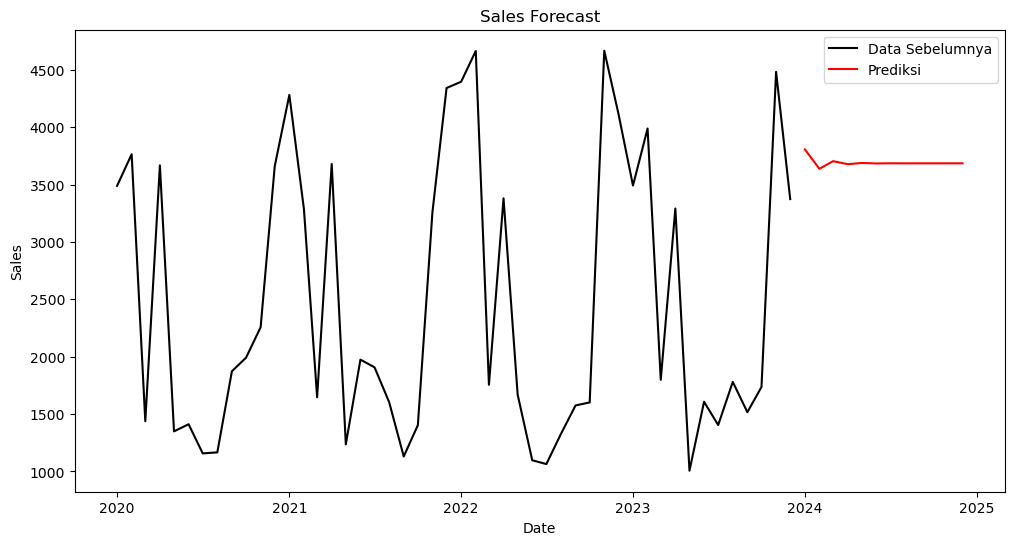

In [9]:
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

## Hasil Prediksi Berdasarkan Maximum dan Minimum Prediksi

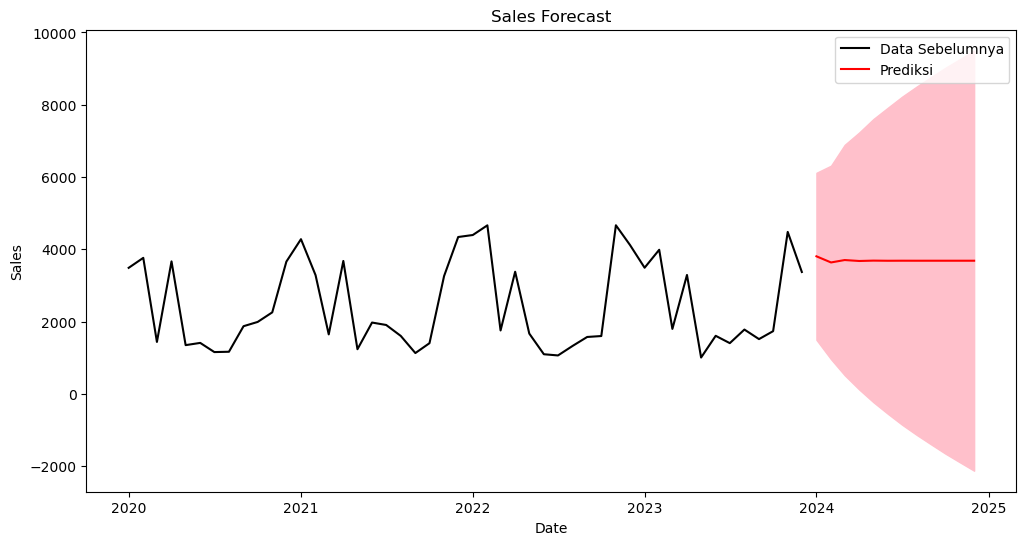

In [10]:
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.fill_between(Confiden_Interval_Prediksi.index, Confiden_Interval_Prediksi.iloc[:, 0], Confiden_Interval_Prediksi.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

# 7. Lakukan Uji MAE dan MSE

Kita bandingkan data prediksi kita dengan data aktual yang yang kita berikan nama "Data_sebelumnya". Uji tersebut dilakukan dengan uji MAE dan MSE:
### MAE menghitung rata-rata absolut dari error, mengukur deviasi prediksi dari nilai aktual tanpa memperhatikan arah deviasi. Uji MAE seperti:
- Menebak tinggi teman, dan setelah itu kamu melihat seberapa jauh tebakan dari tinggi sebenarnya. Semua selisih ini dihitung, lalu kita ambil rata-ratanya.

### MSE menghitung rata-rata dari error yang dikuadratkan, memperbesar error besar dan mengurangi pengaruh error kecil. Uji MSE seperti:
- Sama seperti MAE tetapi pada MSE menggunakan teknik pengkuadratan seperti (100-10)^2. Sehingga MSE memprediksi kesalahan yang lebih serius, terutama jika ada satu prediksi yang sangat salah. 



In [11]:
Data_sebelumnya = sales_data[-Periode:] 
print(Data_sebelumnya)
mae = mean_absolute_error(Data_sebelumnya, Rata_Prediksi) 
mse = mean_squared_error(Data_sebelumnya, Rata_Prediksi) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

            Sales
Tanggal          
2023-01-01   3491
2023-02-01   3988
2023-03-01   1798
2023-04-01   3291
2023-05-01   1006
2023-06-01   1607
2023-07-01   1404
2023-08-01   1780
2023-09-01   1516
2023-10-01   1736
2023-11-01   4482
2023-12-01   3373
MAE: 1427.4931324661393
MSE: 2797794.806827513


# 8. Lihat Uji dengan Kondisi Asli

Pada kasus ini, gunakan data 12 tahun terakhir untuk memperdiksi kemudian kita lihat seberapa akurat prediksi tersebut dengan hasil asli.
1. train_data untuk menyimpan data yang akan kita latih
2. test_data untuk menyimpan data asli tersebut


Interval Kepercayaan Prediksi (Lower, Upper):


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,lower Sales,upper Sales
2023-01-01,1972.488922,6588.285013
2023-02-01,1499.198477,6953.742648
2023-03-01,1010.122231,7478.843844
2023-04-01,610.583854,7866.346950
2023-05-01,244.512413,8236.439153
2023-06-01,-88.978840,8568.587144
2023-07-01,-399.029107,8879.086170
2023-08-01,-689.487182,9169.394322
2023-09-01,-963.793116,9443.750342
2023-10-01,-1224.336847,9704.277341


2023-01-01    4280.386967
2023-02-01    4226.470562
2023-03-01    4244.483037
2023-04-01    4238.465402
2023-05-01    4240.475783
2023-06-01    4239.804152
2023-07-01    4240.028531
2023-08-01    4239.953570
2023-09-01    4239.978613
2023-10-01    4239.970247
2023-11-01    4239.973042
2023-12-01    4239.972108
Freq: MS, Name: predicted_mean, dtype: float64

MAE: 1826.8346609735545
MSE: 4462586.232659253


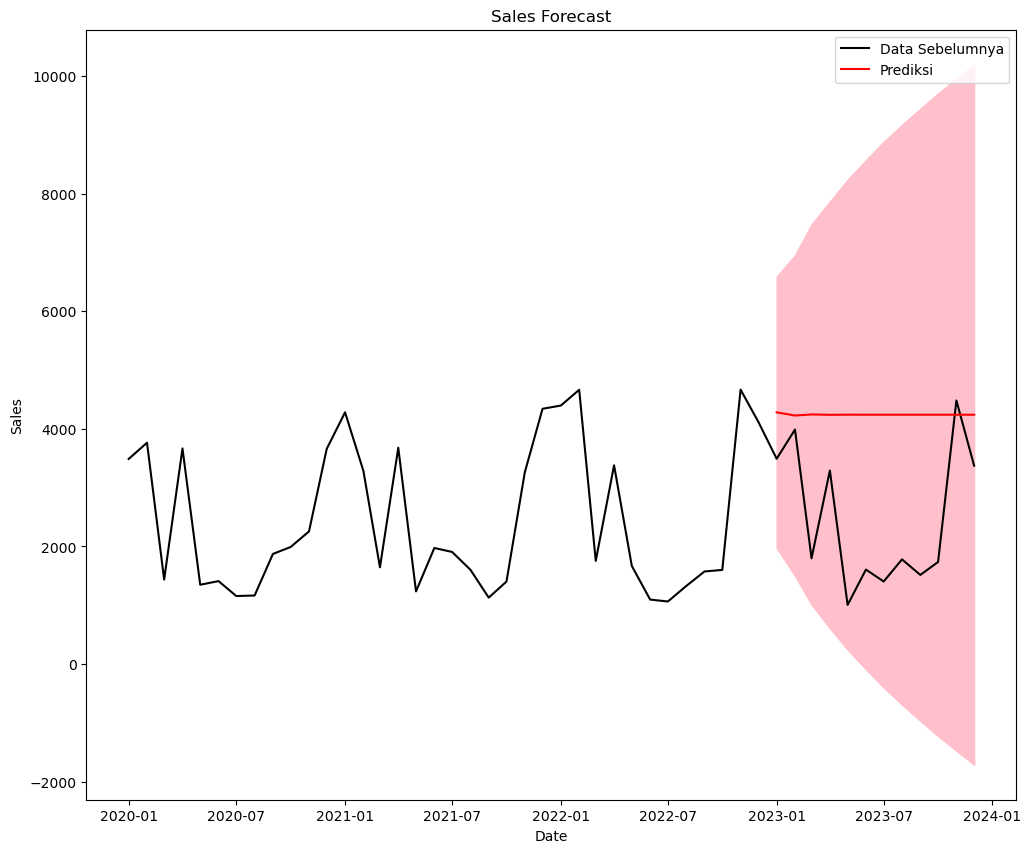

In [12]:
train_data = sales_data[:-12]
test_data = sales_data[-12:]

model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(confidence_interval, predicted_mean)

mae = mean_absolute_error(test_data, predicted_mean)
mse = mean_squared_error(test_data, predicted_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

plt.figure(figsize=(12, 10)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(predicted_mean, label='Prediksi', color='red') 
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()